In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [19]:
import pandas
data=pd.read_csv("uk_shoes.csv",on_bad_lines='skip')

In [20]:
data

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,24/12/2021 02:26:25
1,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,Reviewed in the United States on 28 October 2021,NaN,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,24/12/2021 02:26:25
2,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,Reviewed in the United States on 20 January 2021,NaN,db5a7525-d40b-5265-84d8-df4f29837a3b,24/12/2021 02:26:25
3,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,Reviewed in the United States on 22 April 2021,NaN,75a42851-6462-54b5-988a-27d336221943,24/12/2021 02:26:25
4,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,24/12/2021 02:26:25
...,...,...,...,...,...,...,...,...,...,...,...
6818,https://www.amazon.co.uk/dp/B07TPYWFVN,"Clarks Vennor Wing, Men’s Low-Top Sneakers, Bl...",mauti72,Schick und leicht,"Schicker Schuh, läuft sich gut.",5.0,True,Reviewed in Germany on 15 October 2020,NaN,0850eae1-fa2f-59e6-bf30-ad49151bfa20,24/12/2021 02:29:39
6819,https://www.amazon.co.uk/dp/B07TPYWFVN,"Clarks Vennor Wing, Men’s Low-Top Sneakers, Bl...",Charles Lechesnier,EXCELLENT,Mieux que je ne l'imaginais. Très bonne taille...,5.0,True,Reviewed in France on 23 August 2020,NaN,4bf117ed-ea7c-517c-967c-2aee3f80ed29,24/12/2021 02:29:39
6820,https://www.amazon.co.uk/dp/B084WB2D93,"Rohde Men's Tivoli-H Mule, 82 Anthracite, 12.5 UK",Rebecca Lützenkirchen,Einfach schöne Hausschuhe,Habe sie als Geschenk gekauft und sie sind seh...,5.0,True,Reviewed in Germany on 4 October 2021,NaN,5b129eb2-a438-5377-9c46-217a177615b2,24/12/2021 02:29:39
6821,https://www.amazon.co.uk/dp/B084WB2D93,"Rohde Men's Tivoli-H Mule, 82 Anthracite, 12.5 UK",Sergej Friedel,Langlebig.,Trage diese Hausschuhe fast zwei Monate jeden ...,5.0,True,Reviewed in Germany on 31 January 2021,NaN,91144305-98db-5a55-8ec4-16a253beb811,24/12/2021 02:29:39


In [21]:
data1=data["review_text"]

In [22]:
data1=pd.DataFrame(data1)

In [23]:
data1

,review_text
0,Love these. Was looking for converses and thes...
1,"The shoes are very cute, but after the 2nd day..."
2,Good quality
3,Great
4,Ho scelto il modello bianco con rifinitura die...
...,...
6818,"Schicker Schuh, läuft sich gut."
6819,Mieux que je ne l'imaginais. Très bonne taille...
6820,Habe sie als Geschenk gekauft und sie sind seh...
6821,Trage diese Hausschuhe fast zwei Monate jeden ...


In [24]:
data1['review_text']=data1['review_text'].astype(str).str.replace('\D+','')

In [25]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [26]:
data1 = [review_text.strip() for review_text in data1.review_text]#removing blank spaces
data1 = [review_text for review_text in data1 if review_text]#removing black lines

In [27]:
data1

['Love these. Was looking for converses and these were half the price and so unique— I’ve never seen clear shoes like these; they fit great. The plastic takes a little getting used to but the style is so worth it.',
 'The shoes are very cute, but after the 2nd day of wearing them the tongue started ripping. After the 3rd day of wearing them the plastic on the side ripped. They could have ripped bc I was wearing them to work and I do a lot of walking at work. If you’re going to buy these I don’t recommend wearing them on days where you will do a lot of walking or they might rip',
 'Good quality',
 'Great',
 'Ho scelto il modello bianco con rifinitura dietro nera e posso dire che da vicino le scarpe sono ancora più belle, il mio numero è 38, 38.5 ed ho ordinato il numero 38 e mi va bene..Spedizione veloce, il pacco è arrivato anche prima del previsto, prezzo ottimo dato che in giro costano almeno 10, 15 euro in più.',
 'Sono solita comprare scarpe Guess e non ho mai avuto problemi con la

In [28]:
#tokenizing
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data1))
sentences[0:15]

['Love these.',
 'Was looking for converses and these were half the price and so unique— I’ve never seen clear shoes like these; they fit great.',
 'The plastic takes a little getting used to but the style is so worth it.',
 'The shoes are very cute, but after the 2nd day of wearing them the tongue started ripping.',
 'After the 3rd day of wearing them the plastic on the side ripped.',
 'They could have ripped bc I was wearing them to work and I do a lot of walking at work.',
 'If you’re going to buy these I don’t recommend wearing them on days where you will do a lot of walking or they might rip Good quality Great Ho scelto il modello bianco con rifinitura dietro nera e posso dire che da vicino le scarpe sono ancora più belle, il mio numero è 38, 38.5 ed ho ordinato il numero 38 e mi va bene..Spedizione veloce, il pacco è arrivato anche prima del previsto, prezzo ottimo dato che in giro costano almeno 10, 15 euro in più.',
 'Sono solita comprare scarpe Guess e non ho mai avuto problem

In [29]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Love these.
1,Was looking for converses and these were half ...
2,The plastic takes a little getting used to but...
3,"The shoes are very cute, but after the 2nd day..."
4,After the 3rd day of wearing them the plastic ...
...,...
17337,Reçu dans les délais.
17338,Bravo Habe sie als Geschenk gekauft und sie si...
17339,Gute Verarbeitung.
17340,Trage diese Hausschuhe fast zwei Monate jeden ...


In [30]:
#frequency of words
freq1 = pd.Series(' '.join(sent_df['sentence']).split()).value_counts()[:50] # for top 20
freq1

the            6560
I              6259
and            5516
a              5043
to             3738
for            2669
in             2439
of             2367
are            2285
my             2080
they           2044
is             2040
shoes          1770
but            1715
these          1685
them           1636
on             1578
have           1462
so             1255
that           1194
size           1161
with           1143
not            1127
was            1105
shoe           1064
it             1039
as             1008
The             977
und             957
very            937
y               910
They            902
de              889
fit             845
la              835
like            827
this            820
be              730
que             685
wear            680
you             648
comfortable     645
were            635
me              625
pair            612
die             607
just            584
These           566
no              566
un              564


In [31]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\MD
[nltk_data]     SUFIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\MD
[nltk_data]     SUFIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
my_stopwords = stopwords.words('english')
my_stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [33]:
#removing stopwords
sent_df['sentence1'] = sent_df['sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in (my_stopwords)]))

In [34]:
#removing punctuations
sent_df['clean'] = sent_df['sentence1'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))
sent_df

,sentence,sentence1,clean
0,Love these.,Love these.,Love these.
1,Was looking for converses and these were half ...,Was looking converses half price unique— I’ve ...,Was looking converses half price unique— I’ve ...
2,The plastic takes a little getting used to but...,The plastic takes little getting used style wo...,The plastic takes little getting used style wo...
3,"The shoes are very cute, but after the 2nd day...","The shoes cute, 2nd day wearing tongue started...","The shoes cute, 2nd day wearing tongue started..."
4,After the 3rd day of wearing them the plastic ...,After 3rd day wearing plastic side ripped.,After 3rd day wearing plastic side ripped.
...,...,...,...
17337,Reçu dans les délais.,Reçu dans les délais.,Reçu dans les délais.
17338,Bravo Habe sie als Geschenk gekauft und sie si...,Bravo Habe sie als Geschenk gekauft und sie si...,Bravo Habe sie als Geschenk gekauft und sie si...
17339,Gute Verarbeitung.,Gute Verarbeitung.,Gute Verarbeitung.
17340,Trage diese Hausschuhe fast zwei Monate jeden ...,Trage diese Hausschuhe fast zwei Monate jeden ...,Trage diese Hausschuhe fast zwei Monate jeden ...


In [35]:
sent_df=sent_df.drop('sentence',axis=1)
sent_df=sent_df.drop('sentence1',axis=1)
sent_df

,clean
0,Love these.
1,Was looking converses half price unique— I’ve ...
2,The plastic takes little getting used style wo...
3,"The shoes cute, 2nd day wearing tongue started..."
4,After 3rd day wearing plastic side ripped.
...,...
17337,Reçu dans les délais.
17338,Bravo Habe sie als Geschenk gekauft und sie si...
17339,Gute Verarbeitung.
17340,Trage diese Hausschuhe fast zwei Monate jeden ...


In [37]:
from itertools import islice
def take(n,iterable):
    "Return first n items of the iterable as list"
    return list(islice(iterable,n))

In [38]:
#coverting to dic format and for 20 words
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20,affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [39]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        clean = nlp(text)
        for word in clean:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [40]:
#calulating the sentiment value for each sentence
sent_df['sentiment_value'] = sent_df['clean'].apply(calculate_sentiment)
sent_df['sentiment_value']

0        3
1        7
2        2
3        2
4        0
        ..
17337    0
17338    3
17339    0
17340   -5
17341   -2
Name: sentiment_value, Length: 17342, dtype: int64

In [41]:
#calulating the number of words in each sentence
sent_df['word_count'] = sent_df['clean'].str.split().apply(len)
sent_df['word_count'].head(10)

0     2
1    15
2     9
3     9
4     7
5    11
6    73
7    49
8    15
9    11
Name: word_count, dtype: int64

In [42]:
#sort based on sentiment value
sent_df.sort_values(by='sentiment_value').head(10)

,clean,sentiment_value,word_count
13749,Danach reif für die Mülltonne.Dazu kommt noch ...,-21,132
2631,"Zudem sollten Sie nicht ZU eng sein, wenn die ...",-18,86
5096,"Wie ich ihn dieses Jahr verbringen werde, ist ...",-15,94
13735,Das war uncharakteristisch.Bei unserer großen ...,-14,26
1171,"To add insult injury (no pun intended, althoug...",-12,24
13707,"people buy thing based pictures, asked replace...",-12,77
10988,"Die Schuhe haben ein kräftiges Rot, schon gut ...",-12,33
1266,"Kaufempfehlung Leider musste ich feststellen,d...",-11,28
1763,Die Sohle ist sehr haltbar und nach den 150km ...,-11,82
5180,"weniger.Klingt gut, wenn man sagt, wie liefern...",-11,87


In [43]:
sent_df['sentiment_value'].describe()

count    17342.000000
mean         1.122074
std          2.594576
min        -21.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         36.000000
Name: sentiment_value, dtype: float64

In [44]:
sent_df[sent_df['sentiment_value']<=0]

,clean,sentiment_value,word_count
4,After 3rd day wearing plastic side ripped.,0,7
5,They could ripped bc I wearing work I lot walk...,0,11
7,Sono solita comprare scarpe Guess e non ho mai...,0,49
8,"Io uso plantari su misura per piede piatto, e ...",0,15
9,La scarpa è comoda e da una buona stabilità al...,0,11
...,...,...,...
17336,Bonne largeur.,0,2
17337,Reçu dans les délais.,0,4
17339,Gute Verarbeitung.,0,2
17340,Trage diese Hausschuhe fast zwei Monate jeden ...,-5,27


In [45]:
sent_df[sent_df['sentiment_value']>0]

,clean,sentiment_value,word_count
0,Love these.,3,2
1,Was looking converses half price unique— I’ve ...,7,15
2,The plastic takes little getting used style wo...,2,9
3,"The shoes cute, 2nd day wearing tongue started...",2,9
6,If you’re going buy I don’t recommend wearing ...,2,73
...,...,...,...
17327,Too narrow hard get toddler My son loves them.,2,9
17328,Said comfortable.,2,2
17331,These shoes great price.,3,4
17332,Been loving Skechers shoes son (two now) since...,3,10


In [46]:
sent_df['index']=range(0,len(sent_df))

C:\Users\MD SUFIYA\AppData\Local\Temp\ipykernel_65284\2627599053.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

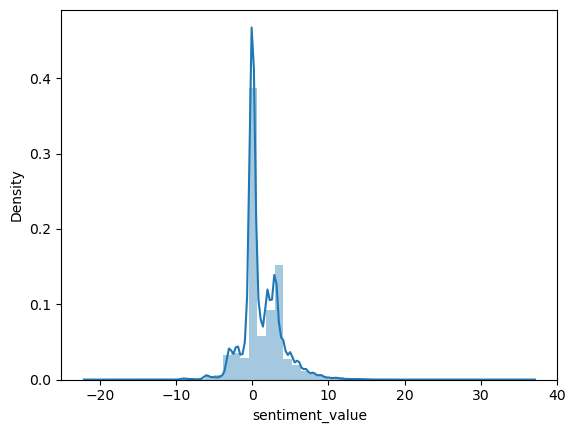

In [47]:
#densityplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

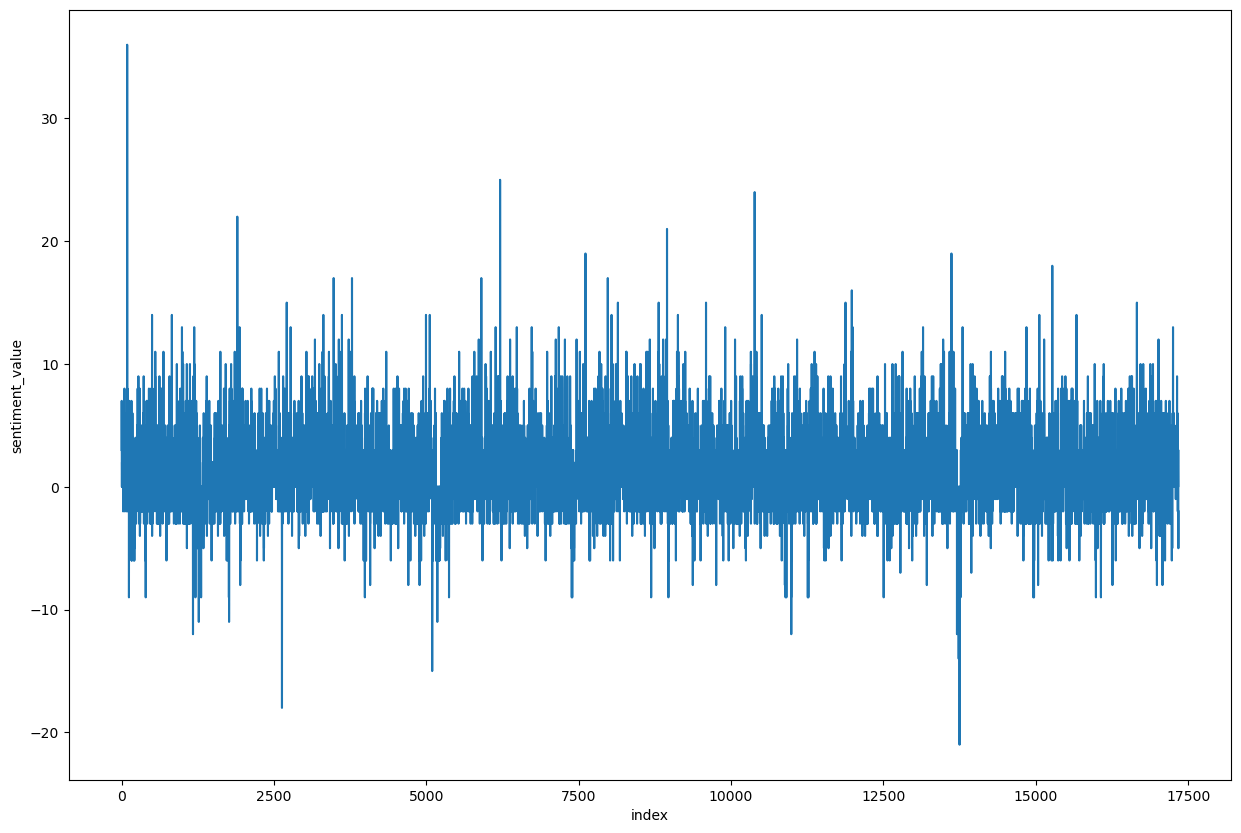

In [48]:
#lineplot based on sentiment value
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

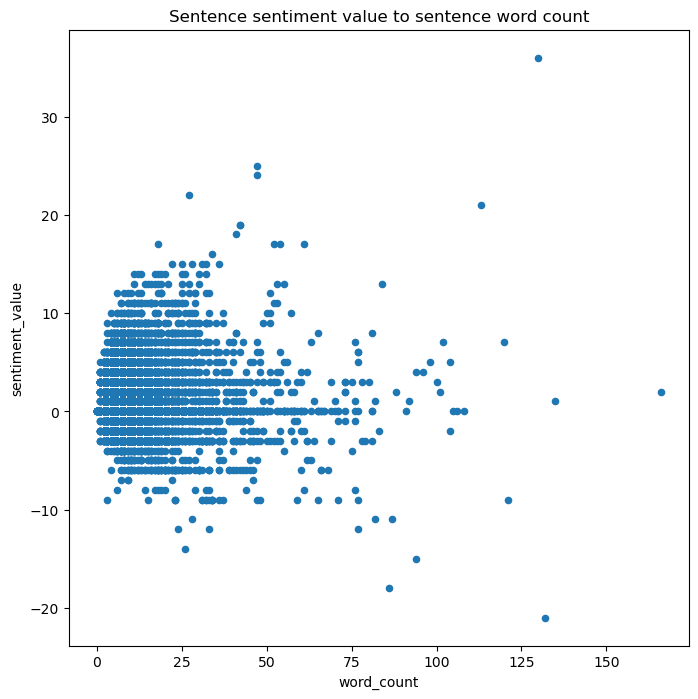

In [49]:
#scatterplot between wordcount and sentiment value
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')


Some Reviews are positive and some are negative, but looking at a broader side, positive reviews are little more than that of the negative ones from the scatter plot. Hence, the product is overall a good one.